### ● 메이저 커피 프랜차이즈 데이터를 이용한 입지 분석!
###     ㄴ 메가커피 http://www.megacoffee.me

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from plotnine import *
import plotnine

# 폰트 관련 / 주피터노트북 폰트 전역 설정을 해놓은 상태임.
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 지도 시각화
import folium

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# 결측치
import missingno as msno

# 노트북 그래프 표시
%matplotlib inline

In [ ]:
url = 'http://www.megacoffee.me/bbs/board.php?bo_table=store&page='

In [ ]:
df = pd.DataFrame()

In [ ]:
for page in range(1, 204):
    page_url = '{}{}'.format(url, page)
    # print(page_url) 변수 꼭 나노 단위로 찍어 보면서 진행!
    df = df.append(pd.read_html(page_url, header=0)[7]) # Pandas 크롤링 개좋음~^^

In [ ]:
df1 = pd.DataFrame(df, columns=['지역', '매장명', '주소'])

In [ ]:
# 대상 사이트의 부하를 줄이기 위해 크롤링 후 파일로 저장함.
df1.to_csv('D:/Python/project/PandasProject/mgc.csv', index = False)

### * 입지 분석을 위한 위경도 수동으로 추가 / 아래 사이트의 도움 받아 데이터 가공함.
###     ㄴhttps://gooddata.go.kr//stdsvc/dataReg.do 위경도 변환 서비스
###     ㄴhttps://m.blog.naver.com/dooits/221746756045 위경도 변환 서비스 사용을 위한 도움 사이트 참조.
###     ㄴhttps://wonhwa.tistory.com/m/29?category=996516 위경도 geopy 사용법 적용도 참조.

In [2]:
df_mgc = pd.read_csv('mgc.csv')

In [3]:
df_mgc

,지역,매장명,주소,위도,경도
0,서울,홍대점,서울특별시 마포구 잔다리로6길 39(서교동),37.552438,126.921376
1,경기,안양1번가점,경기도 안양시 만안구 안양로304번길 13(안양동),37.399718,126.921785
2,경기,성복역점,경기도 용인시 수지구 수지로 125(성복동),37.313388,127.079692
3,대구,대구동성로점,대구광역시 중구 중앙대로 395(동성로3가),35.868358,128.593476
4,서울,강남역점,서울특별시 강남구 테헤란로 101 강남역 지하쇼핑센터 e-35호(역삼동),NaN,NaN
...,...,...,...,...,...
1619,서울,하월곡동점,"서울특별시 성북구 오패산로3길 3, 1층(하월곡동, 홍진빌딩)",37.603678,127.036833
1620,서울,항동지식산업센터점,"서울특별시 구로구 부광로 88, 항동 공공주택지구 내 업무2BL 구로SK V1 ce...",NaN,NaN
1621,부산,온천천점,"부산광역시 동래구 안남로 108, 1층 103호(안락동, 화성코아)",35.192679,129.103542
1622,서울,강남중앙점,"서울특별시 서초구 서초대로77길 35, 1층 102호(서초동)",37.500847,127.025274


#### * 데이터의 결측치 확인합니다.

<AxesSubplot:>

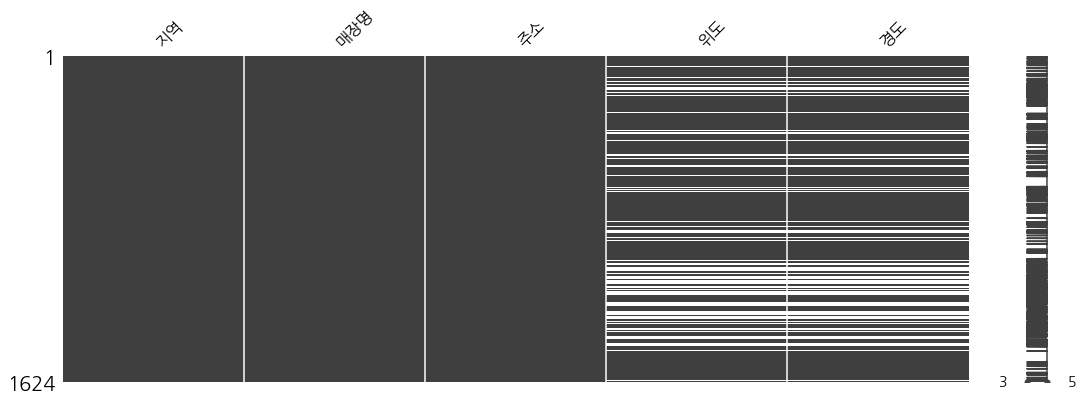

In [4]:
msno.matrix(df_mgc, figsize=(18,6))

In [5]:
df_mgc.isnull().sum()

지역       0
매장명      0
주소       0
위도     383
경도     383
dtype: int64

#### * 위경도 데이터로 그려봅니다.

<AxesSubplot:xlabel='경도', ylabel='위도'>

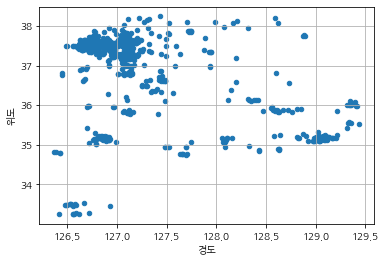

In [6]:
df_mgc[:1000].plot.scatter(x="경도", y="위도", grid="True")

C:\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 383 rows containing missing values.


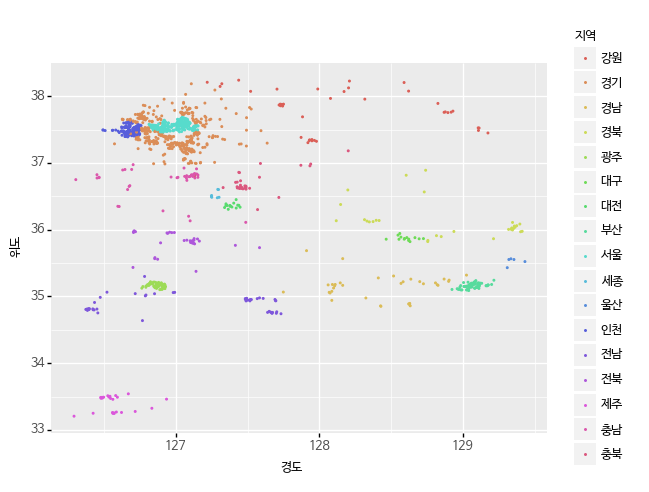

<ggplot: (123506375918)>

In [7]:
(ggplot(df_mgc)
 + aes(x='경도', y='위도', color='지역')
 + geom_point(size=0.2)
 + theme(text=element_text(fontproperties=font))
)

### ★ 전국 메가커피 프랜차이즈 매장 입지 분석!

In [8]:
geo_df = df_mgc.loc[(df_mgc['위도'].notnull()) & (df_mgc['경도'].notnull())]
geo_df.isnull().sum()

지역     0
매장명    0
주소     0
위도     0
경도     0
dtype: int64

In [9]:
geo_df.shape

(1241, 5)

In [10]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=9)

for n in geo_df.index:
    store_name = geo_df['매장명'][n] + ' - ' + geo_df['주소'][n]
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], popup=store_name).add_to(map)
map